[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NU-MSE-LECTURES/465_Computational_Microscopy_2026/blob/dev/Week_01/assignments/assignment_01_setup.ipynb)

# Assignment 1: Environment Setup and Python Basics
**Due Date:** January 12, 2026

## Instructions
1.  Complete the tasks in the cells below.
2.  Ensure all code runs without errors.
3.  Submit your completed notebook via Canvas (or GitHub if instructed).

In [1]:
# Colab setup
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab. Installing requirements...")
    !pip install hyperspy ase py4DSTEM
    !git clone https://github.com/NU-MSE-LECTURES/465_Computational_Microscopy_2026.git
    print("Setup complete.")
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab.")

Running in Google Colab. Installing requirements...
fatal: destination path '465_Computational_Microscopy_2026' already exists and is not an empty directory.
Setup complete.


## Task 1: Environment Verification

Write a Python script to:
1.  Import `sys`, `numpy`, and `matplotlib`.
2.  Print the Python version.
3.  Print the versions of `numpy` and `matplotlib`.

In [2]:
# Your code here
import sys
import numpy as np
import matplotlib

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
NumPy version: 1.26.4
Matplotlib version: 3.10.0


## Task 2: Automate Project Structure

Write a Python script using `os` or `pathlib` to programmatically create the following directory structure inside a folder named `assignment_01_output`:
```
assignment_01_output/
├── data/
│   ├── raw/
│   └── processed/
├── figures/
└── src/
```

In [3]:
# Your code here
import os

base_dir = "assignment_01_output"
subdirs = [
    "data/raw",
    "data/processed",
    "figures",
    "src"
]

for subdir in subdirs:
    path = os.path.join(base_dir, subdir)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: assignment_01_output/data/raw
Created directory: assignment_01_output/data/processed
Created directory: assignment_01_output/figures
Created directory: assignment_01_output/src


## Task 3: Ensure Reproducibility

Demonstrate reproducibility by:
1.  Setting a random seed using `numpy.random.seed()`.
2.  Generating an array of 5 random numbers.
3.  Printing the array.
4.  Run the cell multiple times to verify that the numbers remain the same.

In [4]:
# Your code here
import numpy as np

# Set the seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(5)
print(f"Random numbers: {random_numbers}")

Random numbers: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


## Document the environment


In [6]:
import sys
import numpy as np
import matplotlib
import scipy as sp
import hyperspy as hs
import py4DSTEM as py4

In [7]:
print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {sp.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"HyperSpy version: {hs.__version__}")
print(f"py4DSTEM version: {py4.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
NumPy version: 1.26.4
SciPy version: 1.16.3
Matplotlib version: 3.10.0
HyperSpy version: 2.3.0
py4DSTEM version: 0.14.18


## Load and visualize an EM dataset


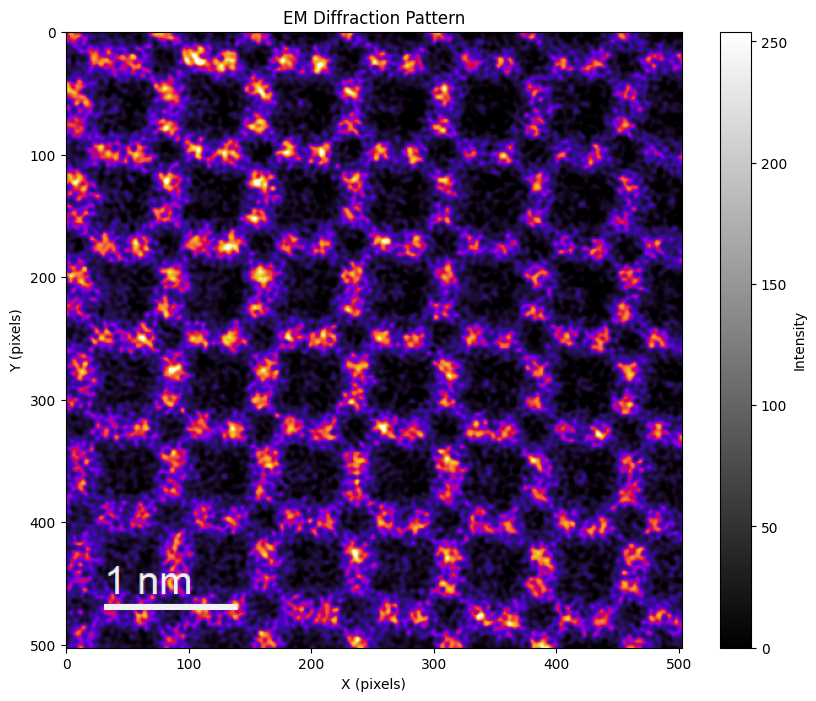

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the TIF file
em_data = mpimg.imread('/content/example_EM_Image.tif')

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image, cmap='gray')
plt.colorbar(label='Intensity')
plt.title('EM Diffraction Pattern')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.show()

## Basic statistics

In [50]:
import numpy as np

# Calculating statistics
min_intensity = np.min(em_data)
max_intensity = np.max(em_data)
mean_intensity = np.mean(em_data)
median_intensity = np.median(em_data)
std_intensity = np.std(em_data)

print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")
print(f"Mean intensity: {mean_intensity:.2f}")
print(f"Median intensity: {median_intensity:.2f}")
print(f"Standard deviation: {std_intensity:.2f}")


Minimum intensity: 0
Maximum intensity: 254
Mean intensity: 59.01
Median intensity: 31.00
Standard deviation: 67.22


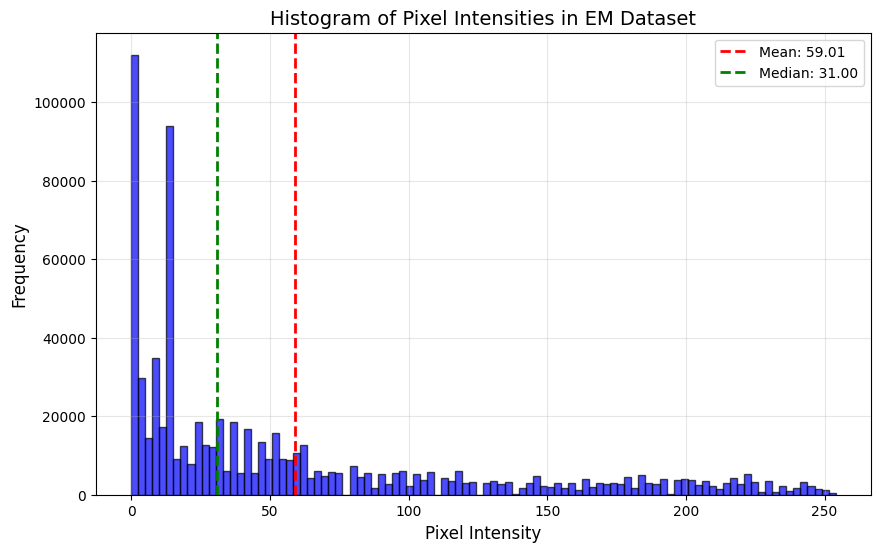

In [51]:
# Plotting histogram for intensities
plt.figure(figsize=(10, 6))
plt.hist(em_data.flatten(), bins=100, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Pixel Intensity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Pixel Intensities in EM Dataset', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axvline(mean_intensity, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_intensity:.2f}')
plt.axvline(median_intensity, color='green', linestyle='--', linewidth=2, label=f'Median: {median_intensity:.2f}')
plt.legend()
plt.show()


The histogram shows a strongly right-skewed pattern with sharp peaks at low intensities (0-20) and a long tail extending to ~260. The mean intensity of 59.01 is nearly double the median of 31.00, confirming significant skewness toward higher values. This distribution is characteristic of electron microscopy data where most of the field of view is dark background, with sparse bright features representing the sample. The wide intensity range (0-260) indicates good contrast between background and structural features. The concentrated low-intensity region suggests the specimen occupies a limited portion of the image, which is typical of TEM or SEM imaging where high electron absorption creates darker regions in dense material.